In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# General Strategy Overview

Based off of principles of Mean Reversion, but with additional requirements of timing to try to buy in at a lower/valley point. Try to figure out when low point has been hit by checking if volume is higher than normal (suggesting at a long term upswing) and current close price is larger than previous day close price. Would ideally like to use something closer to cumulative volume delta to be able to check if the volume is due to more people buying in as opposed to just lots of liquidity, but yfinance doesn't offer that to my knowledge.

In [2]:
ticker = 'AAPL'
# ticker = 'SPY'
window = 10
tiny_window = 10
long_window = 50

df = yf.download(ticker, start='2021-01-01', end='2024-01-01')
df.columns = df.columns.droplevel(1)
df['SMA'] = df['Close'].rolling(window=window).mean()
df['SMA_tiny'] = df['Close'].rolling(window=tiny_window).mean()
df['SMA_long'] = df['Close'].rolling(window=long_window).mean()
df.head()

/tmp/ipython-input-3783338932.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,SMA,SMA_tiny,SMA_long
Date,,,,,,,,
2021-01-04,125.974472,130.062969,123.394822,129.975362,143301900,NaN,NaN,NaN
2021-01-05,127.532013,128.242644,125.020504,125.468298,97664900,NaN,NaN,NaN
2021-01-06,123.239067,127.570935,123.024906,124.329336,155088000,NaN,NaN,NaN
2021-01-07,127.444374,128.135532,124.465612,124.952339,109578200,NaN,NaN,NaN
2021-01-08,128.544357,129.108961,126.772667,128.914259,105158200,NaN,NaN,NaN


In [3]:
spy = yf.download('SPY', start='2021-01-01', end='2024-01-01')
spy.columns = spy.columns.droplevel(1)
spy['SMA'] = spy['Close'].rolling(window=window).mean()
spy['SMA_tiny'] = spy['Close'].rolling(window=tiny_window).mean()
spy['Daily_Return'] = spy['Close'].pct_change()
spy['Daily_Return'] = spy['Daily_Return'].fillna(0)
spy.head()

/tmp/ipython-input-573286608.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start='2021-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,SMA,SMA_tiny,Daily_Return
Date,,,,,,,,
2021-01-04,344.256775,350.473731,340.550872,350.343031,110210800,NaN,NaN,0.000000
2021-01-05,346.627777,347.719957,343.565976,343.612667,66426200,NaN,NaN,0.006887
2021-01-06,348.700012,351.901857,344.564720,345.115467,107997700,NaN,NaN,0.005978
2021-01-07,353.880859,354.627629,350.903068,351.080431,68766800,NaN,NaN,0.014858
2021-01-08,355.897186,356.111868,352.013921,355.271745,71677200,NaN,NaN,0.005698


In [4]:
tvol_std = np.std(df['Volume'])
# volume moving average
df['VOL_MA'] = df['Volume'].rolling(window=window).mean()
# volume moving std dev
df['VOL_MSTD'] = df['Volume'].rolling(window=window).std()
# volume moving z score
df['VOL_MZ'] = (df['Volume'] - df['VOL_MA']) / df['VOL_MSTD']

In [5]:
df['Prev_Close'] = df['Close'].shift(1)

In [6]:
df

Price,Close,High,Low,Open,Volume,SMA,SMA_tiny,SMA_long,VOL_MA,VOL_MSTD,VOL_MZ,Prev_Close
Date,,,,,,,,,,,,
2021-01-04,125.974472,130.062969,123.394822,129.975362,143301900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,127.532013,128.242644,125.020504,125.468298,97664900,NaN,NaN,NaN,NaN,NaN,NaN,125.974472
2021-01-06,123.239067,127.570935,123.024906,124.329336,155088000,NaN,NaN,NaN,NaN,NaN,NaN,127.532013
2021-01-07,127.444374,128.135532,124.465612,124.952339,109578200,NaN,NaN,NaN,NaN,NaN,NaN,123.239067
2021-01-08,128.544357,129.108961,126.772667,128.914259,105158200,NaN,NaN,NaN,NaN,NaN,NaN,127.444374
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600,193.915674,193.915674,183.572861,61175570.0,2.592268e+07,-0.926832,192.858658
2023-12-26,191.243881,192.076019,191.025938,191.798640,28919300,193.902794,193.902794,183.858866,57973130.0,2.786021e+07,-1.042843,191.788773
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,193.748251,193.748251,184.149425,57512210.0,2.799500e+07,-0.336650,191.243881


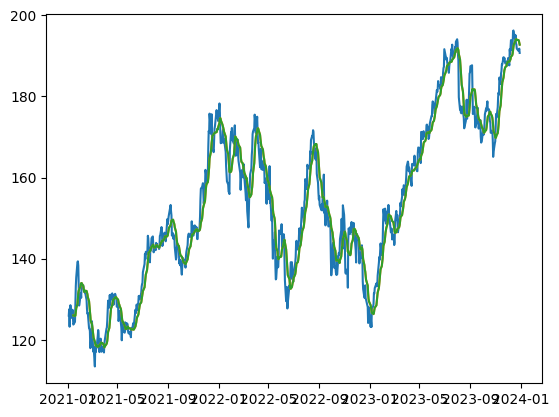

In [7]:


plt.plot(df['Close'])
plt.plot(df['SMA'])
plt.plot(df['SMA_tiny'])
plt.show()

Idea:
if (close > prev day close) and (sma20 > close) and (volume z score > 1): buy
sell any holdings once close >= sma20

In [8]:
threshold = 0.98

In [9]:
df['Signal'] = np.where((df['Close'] > df['Prev_Close']) # Prev_Close
                        & (df['SMA'] * threshold > df['Close'])
                        & (df['VOL_MZ'] > 1), 1, 0)

In [10]:
df['Signal']

,Signal
Date,
2021-01-04,0
2021-01-05,0
2021-01-06,0
2021-01-07,0
2021-01-08,0
...,...
2023-12-22,0
2023-12-26,0
2023-12-27,0


In [11]:
sum(df['Signal'])

6

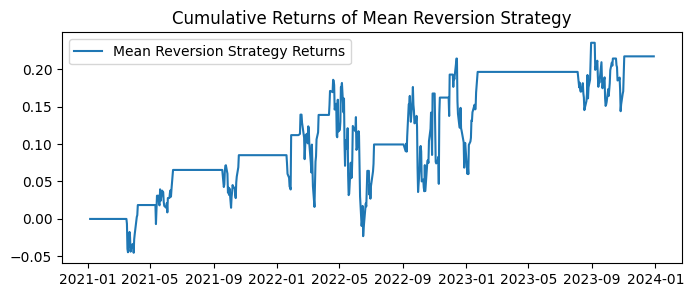

In [12]:
df['MR_Signal'] = np.where(df['Close'] < df['SMA_long'], 1, 0)
df['MR_Returns'] = df['Close'].pct_change()
df['MR_Strategy_Returns'] = df['MR_Signal'].shift(1) * df['MR_Returns']

# Plot cumulative returns
cumulative_returns = (1 + df['MR_Strategy_Returns']).cumprod() - 1
plt.figure(figsize=(8, 3))
plt.plot(cumulative_returns, label='Mean Reversion Strategy Returns')
plt.title('Cumulative Returns of Mean Reversion Strategy')
plt.legend()
plt.show()

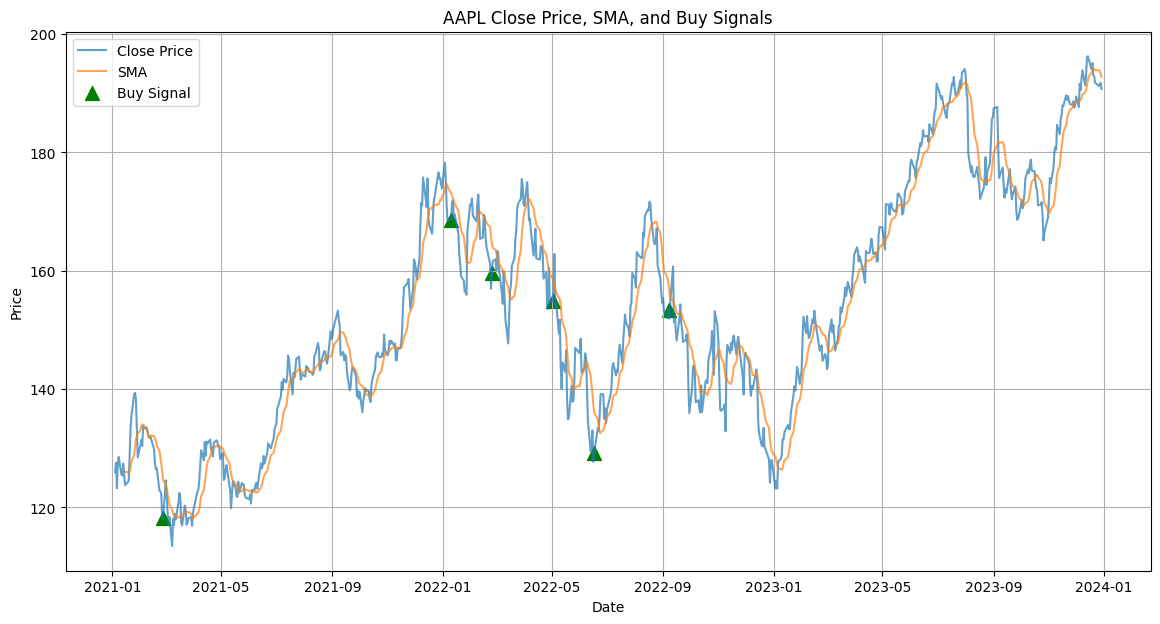

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', alpha=0.7)
plt.plot(df['SMA'], label='SMA', alpha=0.7)

# marking signals
buy_signals = df[df['Signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=100, label='Buy Signal')

plt.title(f'{ticker} Close Price, SMA, and Buy Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
df['Sell_Signal'] = 0

In [15]:
position_open = False
buy_date = None

for i, row in df.iterrows():
    if row['Signal'] == 1:
        position_open = True
        buy_date = i
    elif position_open and row['Close'] > row['SMA'] and i > buy_date:
        df.loc[i, 'Sell_Signal'] = 1
        position_open = False
    elif position_open:
        df.loc[i, 'Signal'] = 1

df['Returns'] = df['Close'].pct_change()
df['Strategy_Returns'] = df['Signal'].shift(1) * df['Returns']

In [16]:
sum(df['Signal'])

26

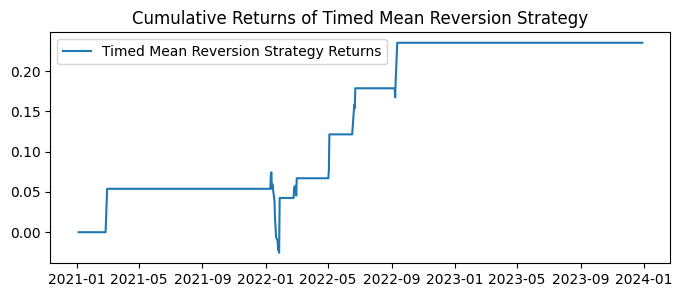

In [17]:
cumulative_returns = (1 + df['Strategy_Returns']).cumprod() - 1
plt.figure(figsize=(8, 3))
plt.plot(cumulative_returns, label='Timed Mean Reversion Strategy Returns')
plt.title('Cumulative Returns of Timed Mean Reversion Strategy')
plt.legend()
plt.show()

# Cleaner Pipeline

In [50]:
def pipeline(ticker, window=20, threshold=0.98, long_window=50, start_date='2021-01-01', end_date='2024-01-01'):
    df = yf.download(ticker, start=start_date, end=end_date)
    df.columns = df.columns.droplevel(1)
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['SMA_long'] = df['Close'].rolling(window=long_window).mean()
    df.head()

    # volume moving average
    df['VOL_MA'] = df['Volume'].rolling(window=window).mean()
    # volume moving std dev
    df['VOL_MSTD'] = df['Volume'].rolling(window=window).std()
    # volume moving z score
    df['VOL_MZ'] = (df['Volume'] - df['VOL_MA']) / df['VOL_MSTD']

    df['Prev_Close'] = df['Close'].shift(1)

    df['Signal'] = np.where((df['Close'] > df['Prev_Close']) # Prev_Close
                            & (df['SMA'] * threshold > df['Close'])
                            & (df['VOL_MZ'] > 1), 1, 0)

    position_open = False
    buy_date = None

    for i, row in df.iterrows():
        if row['Signal'] == 1:
            position_open = True
            buy_date = i
        elif position_open and row['Close'] > row['SMA'] and i > buy_date:
            df.loc[i, 'Sell_Signal'] = 1
            position_open = False
        elif position_open:
            df.loc[i, 'Signal'] = 1

    df['Returns'] = df['Close'].pct_change()
    df['Strategy_Returns'] = df['Signal'].shift(1) * df['Returns']

    cumulative_returns = (1 + df['Strategy_Returns']).cumprod() - 1

    df['MR_Signal'] = np.where(df['Close'] < df['SMA_long'], 1, 0)
    df['MR_Returns'] = df['Close'].pct_change()
    df['MR_Strategy_Returns'] = df['MR_Signal'].shift(1) * df['MR_Returns']

    df['BaH_Strategy_Returns'] = df['Close'].pct_change()

    # Plot cumulative returns
    mr_cumulative_returns = (1 + df['MR_Strategy_Returns']).cumprod() - 1
    total_cumulative_returns = (1 + df['BaH_Strategy_Returns']).cumprod() - 1

    plt.figure(figsize=(11, 7))
    plt.plot(cumulative_returns, label='Timed Mean Reversion Strategy Returns')
    plt.plot(mr_cumulative_returns, label='Mean Reversion Strategy Returns')
    plt.plot(total_cumulative_returns, label='Buy and Hold Strategy Returns')
    plt.title(f'Cumulative Returns of Basic Mean Reversion Strategy for {ticker}')
    plt.legend()
    plt.show()

    N = 252 # multiplier for daily sharpe

    # Timed Mean Reversion Strategy
    timed_returns = df['Strategy_Returns'].dropna()
    timed_sharpe = (timed_returns.mean() / timed_returns.std()) * np.sqrt(N)

    # Simple Mean Reversion Strategy
    mr_returns = df['MR_Strategy_Returns'].dropna()
    mr_sharpe = (mr_returns.mean() / mr_returns.std()) * np.sqrt(N)

    # Buy and Hold Strategy
    bah_returns = df['BaH_Strategy_Returns'].dropna()
    bah_sharpe = (bah_returns.mean() / bah_returns.std()) * np.sqrt(N)

    print(f"Timed Mean Reversion Strategy Sharpe: {timed_sharpe:.2f}")
    print(f"Simple Mean Reversion Strategy Sharpe: {mr_sharpe:.2f}")
    print(f"Buy and Hold Strategy Sharpe: {bah_sharpe:.2f}")

    print(f"Timed Mean Reversion Strategy Returns: {100 * cumulative_returns.iloc[-1]}%")
    print(f"Mean Reversion Strategy Returns: {100 * mr_cumulative_returns.iloc[-1]}%")
    print(f"Buy and Hold Strategy Returns: {100 * total_cumulative_returns.iloc[-1]}%")




/tmp/ipython-input-2125156386.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


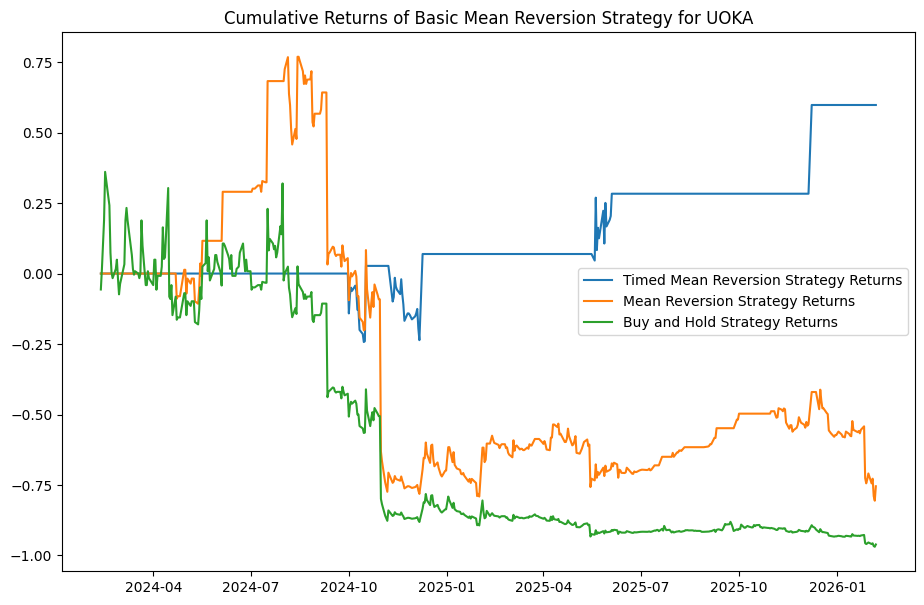

Timed Mean Reversion Strategy Sharpe: 0.68
Simple Mean Reversion Strategy Sharpe: 0.12
Buy and Hold Strategy Sharpe: -0.37
Timed Mean Reversion Strategy Returns: 59.78244885550168%
Mean Reversion Strategy Returns: -75.44530941548835%
Buy and Hold Strategy Returns: -96.09836046812966%


In [51]:
pipeline("UOKA", threshold=0.98, window=20, start_date='2024-02-09', end_date='2026-02-09')

/tmp/ipython-input-2125156386.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


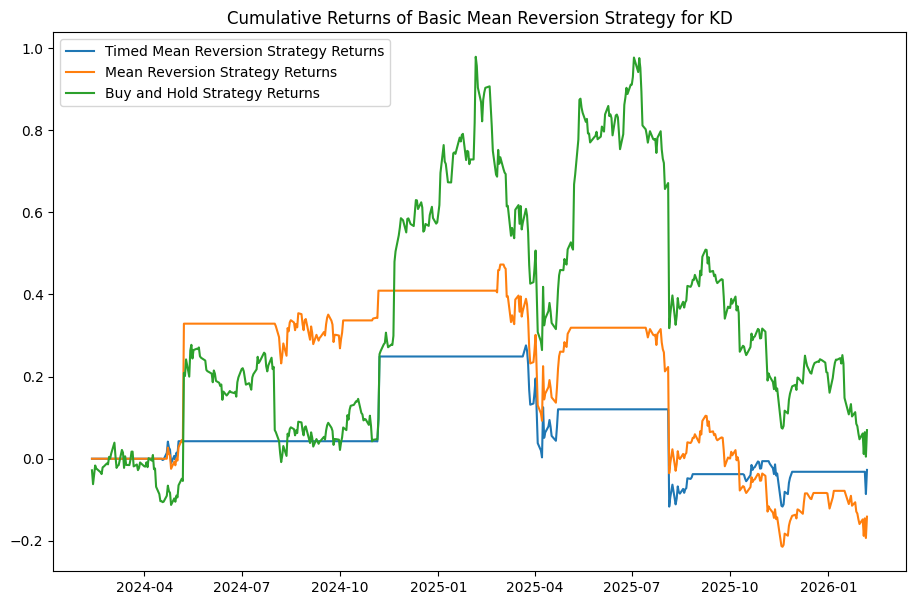

Timed Mean Reversion Strategy Sharpe: 0.08
Simple Mean Reversion Strategy Sharpe: -0.04
Buy and Hold Strategy Sharpe: 0.30
Timed Mean Reversion Strategy Returns: -2.7212617787166105%
Mean Reversion Strategy Returns: -14.106150807126106%
Buy and Hold Strategy Returns: 6.967216532022991%


In [52]:
pipeline("KD", threshold=0.98, window=20, start_date='2024-02-09', end_date='2026-02-09')

/tmp/ipython-input-2125156386.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


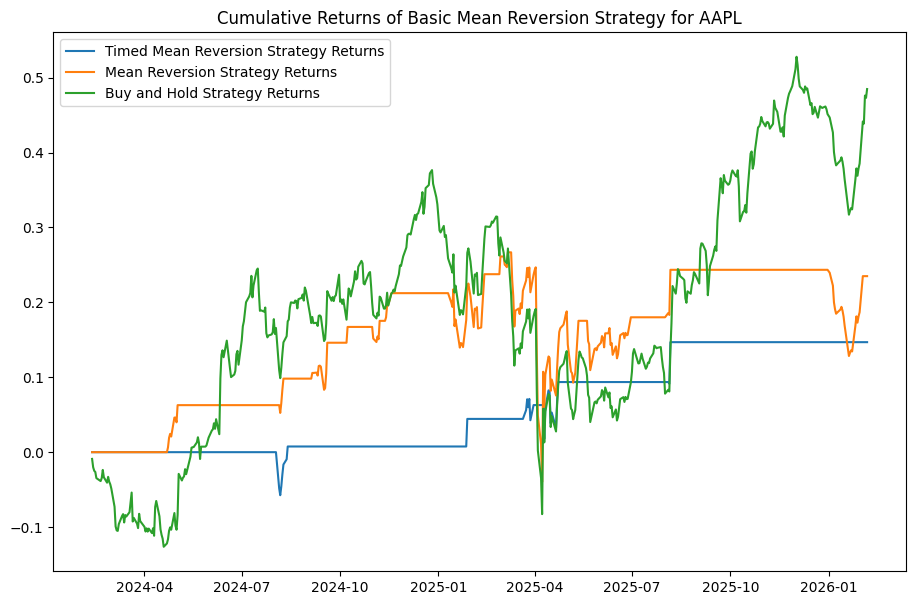

Timed Mean Reversion Strategy Sharpe: 0.80
Simple Mean Reversion Strategy Sharpe: 0.61
Buy and Hold Strategy Sharpe: 0.85
Timed Mean Reversion Strategy Returns: 14.684436387922716%
Mean Reversion Strategy Returns: 23.49721408677825%
Buy and Hold Strategy Returns: 48.47165655601877%


In [53]:
pipeline("AAPL", threshold=0.98, window=20, start_date='2024-02-09', end_date='2026-02-09')

/tmp/ipython-input-2125156386.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


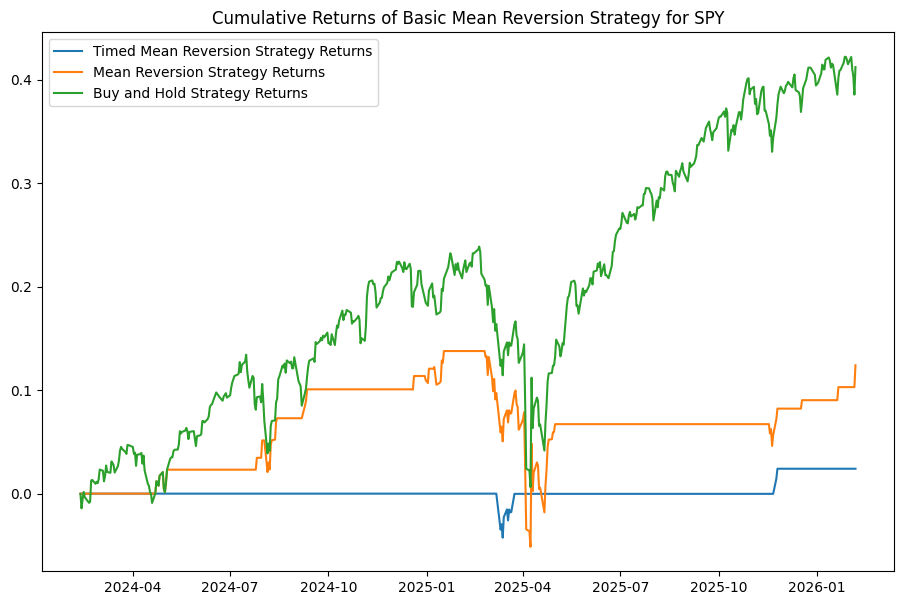

Timed Mean Reversion Strategy Sharpe: 0.37
Simple Mean Reversion Strategy Sharpe: 0.53
Buy and Hold Strategy Sharpe: 1.14
Timed Mean Reversion Strategy Returns: 2.406192320703293%
Mean Reversion Strategy Returns: 12.403120969371928%
Buy and Hold Strategy Returns: 41.199694467762725%


In [54]:
pipeline("SPY", threshold=0.98, window=20, start_date='2024-02-09', end_date='2026-02-09')

# Conclusions:

Time in market >>> Timing the market (at least with this strat)
# 😢😹